### [화학] 와인 품질 분류
Python, Deeplearning Classification, 와인, Wine

https://dacon.io/competitions/open/235610/overview/description

### 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

### 2. Data loading

>- index 구분자
>- quality 품질
>- fixed acidity 산도
>- volatile acidity 휘발성산
>- citric acid 시트르산
>- residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
>- chlorides 염화물
>- free sulfur dioxide 독립 이산화황
>- total sulfur dioxide 총 이산화황
>- density 밀도
>- pH 수소이온농도
>- sulphates 황산염
>- alcohol 도수
>- type 종류


In [2]:
train = pd.read_csv("train.csv")

print(train.shape)
train.head(2)

(5497, 14)


,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red


In [3]:
test = pd.read_csv("test.csv")

print(test.shape)
test.head(2)

(1000, 13)


,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red


In [4]:
submission = pd.read_csv("sample_submission.csv", index_col='index')

print(submission.shape)
submission.head(2)

(1000, 1)


,quality
index,
0,0
1,0


### 3. Preprocessing
#### 3-1) missing values check

In [5]:
train.info()
train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

##### References :

In [6]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

In [7]:
check_missing_col(train), check_missing_col(test), check_missing_col(submission)

결측치가 존재하지 않습니다
결측치가 존재하지 않습니다
결측치가 존재하지 않습니다


([], [], [])

#### 3-2) categorical encoding ( i.e. type )

In [8]:
train["type"].unique()  # ['white', 'red']
train["type"].value_counts(), train["type"].value_counts(normalize=True)

(white    4159
 red      1338
 Name: type, dtype: int64,
 white    0.756595
 red      0.243405
 Name: type, dtype: float64)

In [9]:
train.loc[train["type"] == "white", "type_en"] = 0
train.loc[train["type"] == "red", "type_en"] = 1

train.head(2)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_en
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white,0.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red,1.0


In [10]:
## for Test dataset : 

test["type"].unique()  # ['white', 'red']
test["type"].value_counts(), test["type"].value_counts(normalize=True)

test.loc[test["type"] == "white", "type_en"] = 0
test.loc[test["type"] == "red", "type_en"] = 1

test.head(2)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_en
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.90,0.38,11.6,white,0.0
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.0004,3.06,0.49,9.0,red,1.0


#### 3-3) Stats. (descriptive )

In [11]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
index,5497.0,2748.000000,1586.991546,0.00000,1374.0000,2748.0000,4122.00000,5496.00000
quality,5497.0,5.818992,0.870311,3.00000,5.0000,6.0000,6.00000,9.00000
fixed acidity,5497.0,7.210115,1.287579,3.80000,6.4000,7.0000,7.70000,15.90000
volatile acidity,5497.0,0.338163,0.163224,0.08000,0.2300,0.2900,0.40000,1.58000
citric acid,5497.0,0.318543,0.145104,0.00000,0.2500,0.3100,0.39000,1.66000
residual sugar,5497.0,5.438075,4.756676,0.60000,1.8000,3.0000,8.10000,65.80000
chlorides,5497.0,0.055808,0.034653,0.00900,0.0380,0.0470,0.06400,0.61000
free sulfur dioxide,5497.0,30.417682,17.673881,1.00000,17.0000,29.0000,41.00000,289.00000
total sulfur dioxide,5497.0,115.566491,56.288223,6.00000,78.0000,118.0000,155.00000,440.00000
density,5497.0,0.994673,0.003014,0.98711,0.9923,0.9948,0.99693,1.03898


#### 3-4) Scaling (Standardization, Normalization)

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
s_scaler = StandardScaler()
m_scaler = MinMaxScaler()

In [14]:
train.columns
s_col = ['fixed acidity', 'volatile acidity', 'citric acid',
         'residual sugar', 'chlorides', 'free sulfur dioxide',
         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

train[s_col].head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2


In [15]:
train.drop(columns=["index","quality","type","type_en"]).head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2


In [16]:
train.iloc[:, 2:-2].head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2


##### Standardization 

In [17]:
# pd.DataFrame(s_scaler.fit_transform(train[s_col]), columns=s_col).head(1)
# pd.DataFrame(s_scaler.fit_transform(train.drop(columns=["index","quality","type","type_en"])), columns=s_col).head(1)
df_ss = pd.DataFrame(s_scaler.fit_transform(train.iloc[:, 2:-2]), columns=s_col)

train_ss = pd.concat([train[["index","quality","type","type_en"]], df_ss], axis=1)
print(train_ss.shape)
train_ss.head(2)

(5497, 15)


,index,quality,type,type_en,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,white,0.0,-1.250611,2.186377,-1.78194,0.286345,-0.398500,-1.211937,-0.560852,-0.117252,1.372128,-0.605988,-0.255287
1,1,5,red,1.0,1.234899,1.665574,-1.23056,-0.638755,0.322998,-1.155351,-1.307080,0.738864,-0.183584,0.398147,-0.841348


In [18]:
df_ss.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5497.0,-2.109565e-17,1.000091,-2.648711,-0.629234,-0.163201,0.380505,6.749625
volatile acidity,5497.0,-9.300668e-17,1.000091,-1.581787,-0.662723,-0.295097,0.378883,7.608856
citric acid,5497.0,-3.873763e-17,1.000091,-2.195474,-0.472414,-0.058879,0.492500,9.245647
residual sugar,5497.0,-3.732385e-17,1.000091,-1.017205,-0.764905,-0.512605,0.559670,12.691092
chlorides,5497.0,2.563995e-17,1.000091,-1.350876,-0.513939,-0.254200,0.236418,15.993924
free sulfur dioxide,5497.0,-5.590499e-17,1.000091,-1.664624,-0.759250,-0.080221,0.598809,14.632091
total sulfur dioxide,5497.0,6.332735e-17,1.000091,-1.946703,-0.667456,0.043237,0.700628,5.764315
density,5497.0,1.980507e-14,1.000091,-2.509732,-0.787545,0.042025,0.748819,14.702182
pH,5497.0,2.223556e-15,1.000091,-2.983864,-0.681411,-0.059127,0.625386,4.919150
sulphates,5497.0,1.005805e-17,1.000091,-2.078720,-0.672931,-0.137392,0.465089,9.837018


In [19]:
## for Test dataset :
df_ss = pd.DataFrame(s_scaler.fit_transform(test[s_col]), columns=s_col)

test_ss = pd.concat([test[["index","type","type_en"]], df_ss], axis=1)
print(test_ss.shape)
test_ss.head(2)

(1000, 14)


,index,type,type_en,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,white,0.0,1.306951,-0.220579,1.098184,0.236865,-0.385503,-1.108531,-0.756734,-0.352060,-1.943080,-1.068114,1.000172
1,1,red,1.0,4.507070,0.477272,1.780836,-0.749722,0.343645,-0.888114,-1.327873,1.915724,-0.949812,-0.311854,-1.203025


##### Normalization 

In [20]:
# pd.DataFrame(m_scaler.fit_transform(train[s_col]), columns=s_col).head(1)
# pd.DataFrame(m_scaler.fit_transform(train.drop(columns=["index","quality","type","type_en"])), columns=s_col).head(1)
df_mm = pd.DataFrame(m_scaler.fit_transform(train.iloc[:, 2:-2]), columns=s_col)

train_mm = pd.concat([train[["index","quality","type","type_en"]], df_mm], axis=1)
print(train_mm.shape)
train_mm.head(2)

(5497, 15)


,index,quality,type,type_en,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,5,white,0.0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841
1,1,5,red,1.0,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391


In [21]:
df_mm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,5497.0,0.281828,0.106411,0.0,0.214876,0.264463,0.322314,1.0
volatile acidity,5497.0,0.172108,0.108816,0.0,0.100000,0.140000,0.213333,1.0
citric acid,5497.0,0.191893,0.087412,0.0,0.150602,0.186747,0.234940,1.0
residual sugar,5497.0,0.074204,0.072955,0.0,0.018405,0.036810,0.115031,1.0
chlorides,5497.0,0.077884,0.057659,0.0,0.048253,0.063228,0.091514,1.0
free sulfur dioxide,5497.0,0.102145,0.061368,0.0,0.055556,0.097222,0.138889,1.0
total sulfur dioxide,5497.0,0.252457,0.129696,0.0,0.165899,0.258065,0.343318,1.0
density,5497.0,0.145814,0.058105,0.0,0.100058,0.148255,0.189319,1.0
pH,5497.0,0.377560,0.126546,0.0,0.291339,0.370079,0.456693,1.0
sulphates,5497.0,0.174452,0.083930,0.0,0.117978,0.162921,0.213483,1.0


In [22]:
df_mm = pd.DataFrame(m_scaler.fit_transform(test[s_col]), columns=s_col)

test_mm = pd.concat([test[["index","type","type_en"]], df_mm], axis=1)
print(test_mm.shape)
test_mm.head(2)

(1000, 14)


,index,type,type_en,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,white,0.0,0.421053,0.198276,0.592593,0.269406,0.048576,0.082305,0.234043,0.376667,0.169811,0.138889,0.571429
1,1,red,1.0,0.798246,0.301724,0.716049,0.054795,0.093802,0.115226,0.117021,0.816667,0.320755,0.240741,0.107143


In [23]:
train.head(3)
train.tail(3)

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_en
5494,5494,7,7.8,0.15,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white,0.0
5495,5495,5,6.6,0.41,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white,0.0
5496,5496,6,7.0,0.35,0.17,1.1,0.049,7.0,119.0,0.99297,3.13,0.36,9.7,white,0.0


### 4. Analysis
#### 4-1) Correlation analysis

<AxesSubplot:>

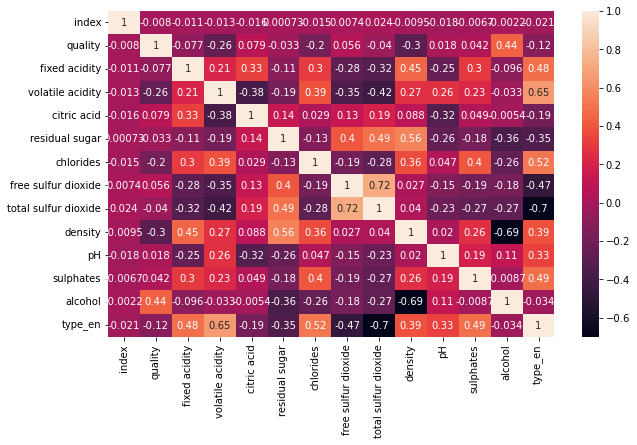

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:>

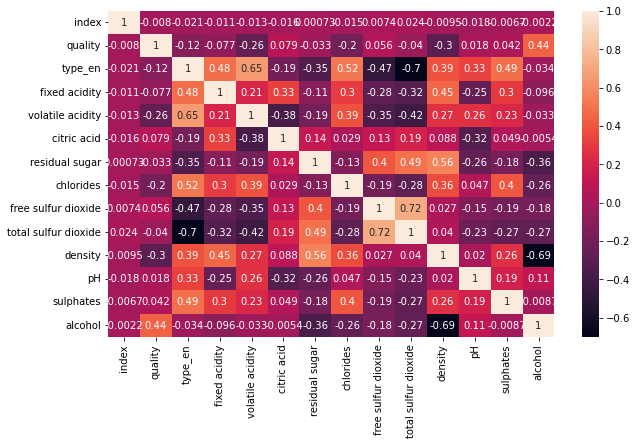

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(train_ss.corr(), annot=True)

<AxesSubplot:>

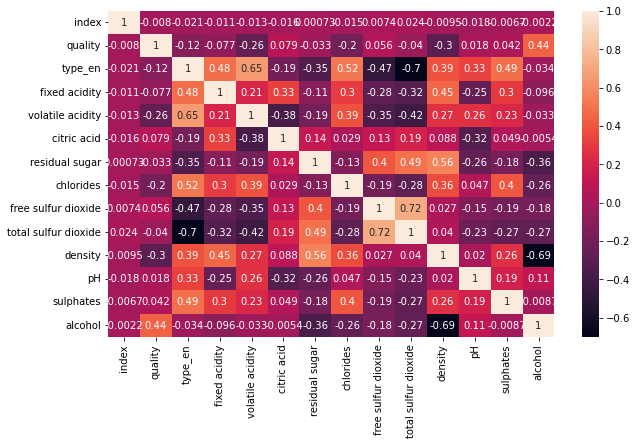

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(train_mm.corr(), annot=True)

In [27]:
train.corr()["quality"].sort_values()

density                -0.299831
volatile acidity       -0.261557
chlorides              -0.198148
type_en                -0.118280
fixed acidity          -0.076506
total sulfur dioxide   -0.039732
residual sugar         -0.032848
index                  -0.008045
pH                      0.017931
sulphates               0.042068
free sulfur dioxide     0.055574
citric acid             0.079157
alcohol                 0.439615
quality                 1.000000
Name: quality, dtype: float64

#### 4-2) Visualization (EDA)

##### label distribution

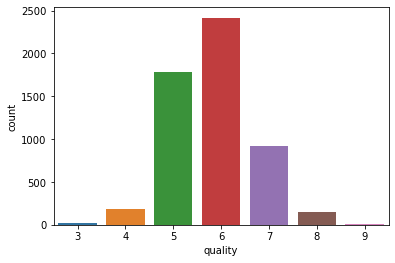

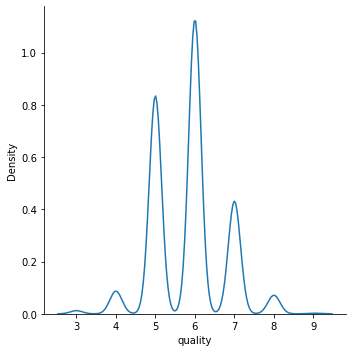

In [28]:
sns.countplot(train["quality"])
sns.displot(train["quality"], kind='kde')

##### features

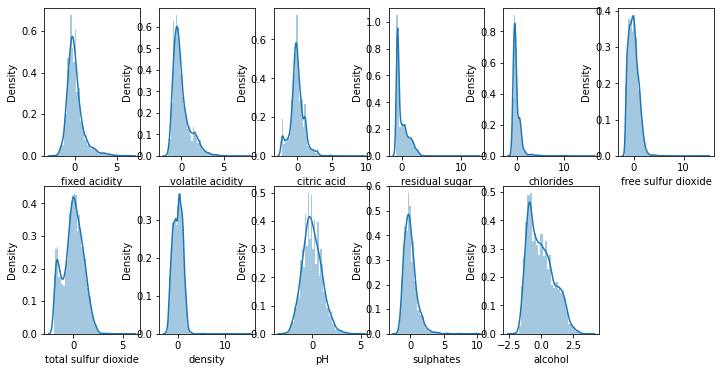

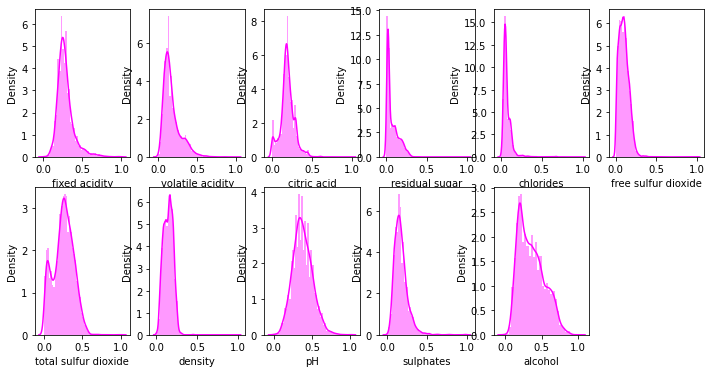

In [29]:
plt.figure(figsize=(12,6))
for l in range(len(s_col)):
    ax = plt.subplot(2,6,l+1)
    sns.distplot(train_ss[s_col[l]], ax=ax)
plt.show()

plt.figure(figsize=(12,6))
for l in range(len(s_col)):
    ax = plt.subplot(2,6,l+1)
    sns.distplot(train_mm[s_col[l]], ax=ax, color='magenta')
plt.show()

##### feature transformation by log

<AxesSubplot:xlabel='type_en', ylabel='count'>

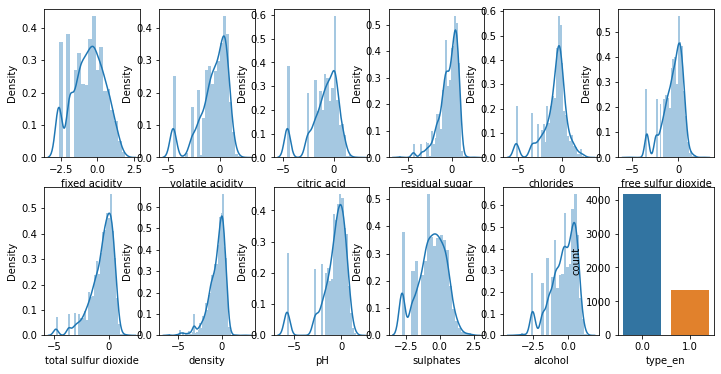

In [30]:
figure, ax = plt.subplots(2,6)
figure.set_size_inches(12,6)

sns.distplot(np.log(train_ss['fixed acidity']), ax=ax[0,0])
sns.distplot(np.log(train_ss['volatile acidity']), ax=ax[0,1])
sns.distplot(np.log(train_ss['citric acid']), ax=ax[0,2])
sns.distplot(np.log(train_ss['residual sugar']), ax=ax[0,3])
sns.distplot(np.log(train_ss['chlorides']), ax=ax[0,4])
sns.distplot(np.log(train_ss['free sulfur dioxide']), ax=ax[0,5])

sns.distplot(np.log(train_ss['total sulfur dioxide']), ax=ax[1,0])
sns.distplot(np.log(train_ss['density']), ax=ax[1,1])
sns.distplot(np.log(train_ss['pH']), ax=ax[1,2])
sns.distplot(np.log(train_ss['sulphates']), ax=ax[1,3])
sns.distplot(np.log(train_ss['alcohol']), ax=ax[1,4])
sns.countplot(data=train_ss, x='type_en', ax=ax[1,5])

##### features vs label (quality)

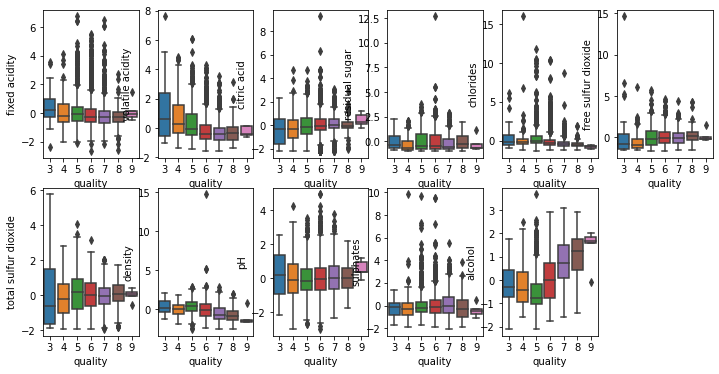

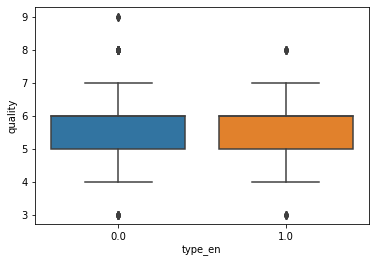

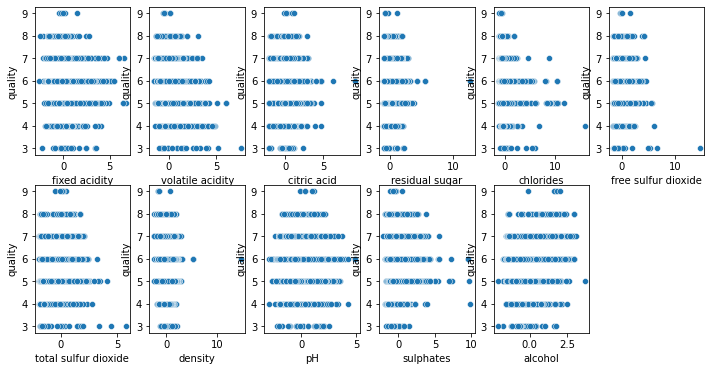

In [31]:
plt.figure(figsize=(12,6))
for l in range(len(s_col)):
    ax = plt.subplot(2,6,l+1)
    sns.boxplot(data=train_ss, x='quality', y=s_col[l], ax=ax)
plt.show()
sns.boxplot(data=train_ss, y='quality', x="type_en")


plt.figure(figsize=(12,6))
for l in range(len(s_col)):
    ax = plt.subplot(2,6,l+1)
    sns.scatterplot(data=train_ss, y='quality', x=s_col[l], ax=ax)
plt.show()

### 5. Modeling
#### 5-1) feature selection

In [33]:
# s_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
#          'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
#          'pH', 'sulphates', 'alcohol', 'type_en']
s_col = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 
         'total sulfur dioxide', 
         'density', 
         'type_en',
         'pH', 'sulphates', 'alcohol']

In [34]:
# train.drop(columns=['index', 'quality','type'])
# train_mm.drop(columns=['index', 'quality','type'])
# train_ss.drop(columns=['index', 'quality','type'])

X_train = train_ss[s_col]
y_train = train_ss['quality']

In [35]:
# X_test = test_ss.drop(columns=['index', 'type', 'type_en',"free sulfur dioxide"])
X_test = test_ss[s_col]

#### 5-2) Model : RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=41)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

##### after tunned :

In [93]:
rf_clf = RandomForestClassifier(max_depth=21, max_leaf_nodes=803, min_samples_split=5, n_estimators=1121)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

##### feature importance

In [94]:
pd.DataFrame(rf_clf.feature_importances_, 
             index=X_train.columns, columns=["f_importances"]).sort_values(by="f_importances")

,f_importances
type_en,0.003474
fixed acidity,0.072071
citric acid,0.077453
pH,0.080336
residual sugar,0.083703
free sulfur dioxide,0.084845
sulphates,0.086236
chlorides,0.086541
total sulfur dioxide,0.089625
volatile acidity,0.102055


#### 5-3) Model : GradientBoost

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gb_clf = GradientBoostingClassifier(n_estimators=250, random_state=41)

gb_clf.fit(X_train, y_train)
pred = gb_clf.predict(X_test)

#### 5-4) Model : LogisticReg

In [110]:
from sklearn.linear_model import LogisticRegression

In [ ]:
l_reg = LogisticRegression(max_iter=200, random_state=41)

l_reg.fit(X_train, y_train)
pred = l_reg.predict(X_test)

#### 5-5) Model : LightGBM

In [29]:
from lightgbm import LGBMClassifier, plot_importance

In [87]:
lgbm_clf = LGBMClassifier(n_estimators=200, random_state=41)

In [88]:
lgbm_clf.fit(X_train, y_train, verbose=True)

LGBMClassifier(n_estimators=200, random_state=41)

In [ ]:
pred = lgbm_clf.predict(X_test)
pred

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

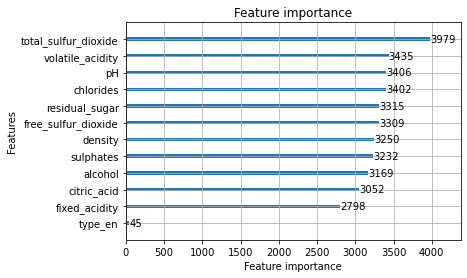

In [66]:
lgbm_clf.feature_importances_
plot_importance(lgbm_clf)

### 6. Report / Submssion 

In [95]:
submission["quality"] = pred
submission.head(3)

,quality
index,
0,6
1,5
2,6


In [96]:
submission.to_csv("dacon-wine-220316_1434.csv")

### 7. Evaluation / Validation
#### 7-1) Hold-out

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [78]:
X_fit, X_val, y_fit, y_val = train_test_split(X_train, y_train, test_size=0.2, 
                                              stratify=y_train, random_state=41)

In [79]:
## RF :
rf_clf.fit(X_fit, y_fit)
pred_val = rf_clf.predict(X_val)

In [119]:
## GB :
gb_clf.fit(X_fit, y_fit)
pred_val = gb_clf.predict(X_val)

In [114]:
## LR :
l_reg.fit(X_fit, y_fit)
pred_val = l_reg.predict(X_val)

In [80]:
accuracy_score(y_val, pred_val)

0.6736363636363636

#### 7-2) Cross-validation (KFold)

In [81]:
from sklearn.model_selection import KFold, StratifiedKFold

In [82]:
kfold = KFold(n_splits=5)

In [83]:
log_kfold = []; i = 0

for fit, val in kfold.split(X_train):
    X_fit, X_val = X_train.loc[fit], X_train.loc[val]
    y_fit, y_val = y_train.loc[fit], y_train.loc[val]
    
    ## RF :
    rf_clf.fit(X_fit, y_fit)
    pred_val = rf_clf.predict(X_val)
    
    ## LightGBM :
#     lgbm_clf.fit(X_fit, y_fit)
#     pred_val = lgbm_clf.predict(X_val)    
    
    score_val = accuracy_score(y_val, pred_val)
    i += 1
    print(f"fold : {i}, score = {score_val}")
    
    log_kfold.append({
        'cnt' : i,
        'score' : score_val
    })
    
df_log = pd.DataFrame(log_kfold)    
df_log["score"].mean()

fold : 1, score = 0.6836363636363636
fold : 2, score = 0.6863636363636364
fold : 3, score = 0.6696997270245678
fold : 4, score = 0.6651501364877161
fold : 5, score = 0.6606005459508644


0.6730900818926298

In [ ]:
#### RF : 
# 0.67818   ->   0.688
# 0.68181   ->   0.69
# 0.67563   ->   0.692
# 0.67309   ->   0.663
# 0.67272   ->   0.684
# 0.67309   ->   0.685

## GB :
# 0.61      ->   0.61

## LGBM : 
# 0.66089  ->    0.661

In [106]:
skfold = StratifiedKFold(n_splits=5)

In [132]:
log_kfold = []; i = 0

for fit, val in skfold.split(X_train, y_train):
    X_fit, X_val = X_train.loc[fit], X_train.loc[val]
    y_fit, y_val = y_train.loc[fit], y_train.loc[val]
    
    ## RF :
    rf_clf.fit(X_fit, y_fit)
    pred_val = rf_clf.predict(X_val)
    
    ## LightGBM :
#     lgbm_clf.fit(X_fit, y_fit)
#     pred_val = lgbm_clf.predict(X_val)    
    
    score_val = accuracy_score(y_val, pred_val)
    i += 1
    print(f"fold : {i}, score = {score_val}")
    
    log_kfold.append({
        'cnt' : i,
        'score' : score_val
    })
    
df_log = pd.DataFrame(log_kfold)    
df_log["score"].mean()

fold : 1, score = 0.7018181818181818
fold : 2, score = 0.69
fold : 3, score = 0.6742493175614195
fold : 4, score = 0.6760691537761602
fold : 5, score = 0.6651501364877161


0.6814573579286956

### 8. Tuning

#### 8-0) Optuna

In [89]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

from sklearn.model_selection import cross_val_score

In [91]:
def RF_objective(trial):
    max_depth = trial.suggest_int('max_depth', 18, 23)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 1000)
    min_samples_split = trial.suggest_int('min_samples_split', 3, 12)
    n_estimators =  trial.suggest_int('n_estimators', 1100, 1150)
   
    model = RandomForestClassifier(max_depth = max_depth, 
                                   max_leaf_nodes = max_leaf_nodes, 
                                   n_estimators = n_estimators,
                                   min_samples_split = min_samples_split,
                                   n_jobs=2,
                                   random_state=41)
    
    model.fit(X_train, y_train)    
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    accuracy_mean = score.mean()

    return accuracy_mean
    
#Execute optuna and set hyperparameters
RF_study = optuna.create_study(direction='maximize')
RF_study.optimize(RF_objective, n_trials=10)

#Create an instance with tuned hyperparameters
optimized_RF = RandomForestClassifier(max_depth = RF_study.best_params['max_depth'],
                                      max_leaf_nodes = RF_study.best_params['max_leaf_nodes'],
                                      min_samples_split = RF_study.best_params['min_samples_split'],
                                      n_estimators = RF_study.best_params['n_estimators'],
                                      n_jobs=2,
                                      random_state=41)

[I 2022-03-16 14:27:42,188] A new study created in memory with name: no-name-5d866c62-624d-4f88-ad9a-4f2f435e0e03
[I 2022-03-16 14:28:03,879] Trial 0 finished with value: 0.6596284225328811 and parameters: {'max_depth': 22, 'max_leaf_nodes': 873, 'min_samples_split': 11, 'n_estimators': 1134}. Best is trial 0 with value: 0.6596284225328811.
[I 2022-03-16 14:28:24,017] Trial 1 finished with value: 0.6514411448424188 and parameters: {'max_depth': 19, 'max_leaf_nodes': 677, 'min_samples_split': 12, 'n_estimators': 1110}. Best is trial 0 with value: 0.6596284225328811.
[I 2022-03-16 14:28:42,239] Trial 2 finished with value: 0.6337981636198197 and parameters: {'max_depth': 23, 'max_leaf_nodes': 279, 'min_samples_split': 10, 'n_estimators': 1118}. Best is trial 0 with value: 0.6596284225328811.
[I 2022-03-16 14:28:59,360] Trial 3 finished with value: 0.6148801389693109 and parameters: {'max_depth': 21, 'max_leaf_nodes': 171, 'min_samples_split': 5, 'n_estimators': 1132}. Best is trial 0 wit

#### 8-1) GridSearch

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
params = {
    "n_estimators" : [1130,1140,1150],
    "max_depth" : [18,19,20,21,22,23],
    "min_samples_split" : [3,5,7,9]
}

In [72]:
rf_clf_grid = RandomForestClassifier(random_state=41)

In [73]:
grid_rf_clf = GridSearchCV(estimator=rf_clf_grid, param_grid=params, cv=5, 
                          scoring='accuracy', verbose=1, n_jobs=-1)

In [74]:
grid_rf_clf.fit(X_train, y_train)

print(grid_rf_clf.best_score_)
print(grid_rf_clf.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0.6776380180329225
RandomForestClassifier(max_depth=22, min_samples_split=3, n_estimators=1140,
                       random_state=41)


#### 8-2) hyper parameters

##### n_estimators

In [60]:
lst_hp = range(1135,1160,2)
log_hp = []

for hp in lst_hp:
    rf_clf_tun = RandomForestClassifier(n_estimators=hp, random_state=41)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"n_estimators : {hp}, score(fit) = {score_fit:.5f}, score(val) = {score_val:.5f}")
    log_hp.append({
        "n_estimators" : hp,
        "score(fit)" : score_fit,
        "score(val)" : score_val
    })
    
df_log = pd.DataFrame(log_hp)    

n_estimators : 1135, score(fit) = 1.00000, score(val) = 0.67061
n_estimators : 1137, score(fit) = 1.00000, score(val) = 0.67061
n_estimators : 1139, score(fit) = 1.00000, score(val) = 0.67061
n_estimators : 1141, score(fit) = 1.00000, score(val) = 0.67061


KeyboardInterrupt: 

In [ ]:
# plt.plot(df_log["n_estimators"], df_log["score(fit)"], label='fit', color='b')
plt.plot(df_log["n_estimators"], df_log["score(val)"], label='val', color='r')
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.legend()

##### max_depth

In [61]:
lst_hp = range(2,31)
log_hp = []

for hp in lst_hp:
    rf_clf_tun = RandomForestClassifier(max_depth=hp, random_state=41)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"max_depth : {hp}, score(fit) = {score_fit:.5f}, score(val) = {score_val:.5f}")
    log_hp.append({
        "max_depth" : hp,
        "score(fit)" : score_fit,
        "score(val)" : score_val
    })
    
df_log = pd.DataFrame(log_hp)    

max_depth : 2, score(fit) = 0.53502, score(val) = 0.52866
max_depth : 3, score(fit) = 0.54275, score(val) = 0.53230
max_depth : 4, score(fit) = 0.56253, score(val) = 0.55232
max_depth : 5, score(fit) = 0.58686, score(val) = 0.56506
max_depth : 6, score(fit) = 0.62369, score(val) = 0.57871
max_depth : 7, score(fit) = 0.66394, score(val) = 0.59236
max_depth : 8, score(fit) = 0.70919, score(val) = 0.60965
max_depth : 9, score(fit) = 0.76558, score(val) = 0.61328
max_depth : 10, score(fit) = 0.82833, score(val) = 0.61692
max_depth : 11, score(fit) = 0.88654, score(val) = 0.63421
max_depth : 12, score(fit) = 0.93361, score(val) = 0.65423
max_depth : 13, score(fit) = 0.96726, score(val) = 0.65059
max_depth : 14, score(fit) = 0.98272, score(val) = 0.66697
max_depth : 15, score(fit) = 0.99363, score(val) = 0.67425
max_depth : 16, score(fit) = 0.99750, score(val) = 0.67607
max_depth : 17, score(fit) = 0.99955, score(val) = 0.67061
max_depth : 18, score(fit) = 0.99977, score(val) = 0.66879
max_d

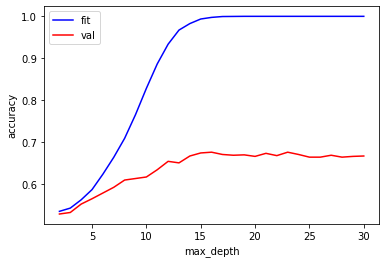

In [62]:
plt.plot(df_log["max_depth"], df_log["score(fit)"], label='fit', color='b')
plt.plot(df_log["max_depth"], df_log["score(val)"], label='val', color='r')
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()

##### min_samples_split

In [65]:
lst_hp = range(2,31)
log_hp = []

for hp in lst_hp:
    rf_clf_tun = RandomForestClassifier(min_samples_split=hp, random_state=41)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"min_samples_split : {hp}, score(fit) = {score_fit:.5f}, score(val) = {score_val:.5f}")
    log_hp.append({
        "min_samples_split" : hp,
        "score(fit)" : score_fit,
        "score(val)" : score_val
    })
    
df_log = pd.DataFrame(log_hp) 

min_samples_split : 2, score(fit) = 1.00000, score(val) = 0.66879
min_samples_split : 3, score(fit) = 1.00000, score(val) = 0.66333
min_samples_split : 4, score(fit) = 0.99864, score(val) = 0.66788
min_samples_split : 5, score(fit) = 0.99500, score(val) = 0.67152
min_samples_split : 6, score(fit) = 0.98704, score(val) = 0.65696
min_samples_split : 7, score(fit) = 0.97408, score(val) = 0.66515
min_samples_split : 8, score(fit) = 0.96021, score(val) = 0.66242
min_samples_split : 9, score(fit) = 0.94748, score(val) = 0.66060
min_samples_split : 10, score(fit) = 0.92701, score(val) = 0.65696
min_samples_split : 11, score(fit) = 0.91746, score(val) = 0.64513
min_samples_split : 12, score(fit) = 0.90337, score(val) = 0.63694
min_samples_split : 13, score(fit) = 0.89245, score(val) = 0.64604
min_samples_split : 14, score(fit) = 0.87926, score(val) = 0.63785
min_samples_split : 15, score(fit) = 0.87290, score(val) = 0.63057
min_samples_split : 16, score(fit) = 0.86176, score(val) = 0.63694
min

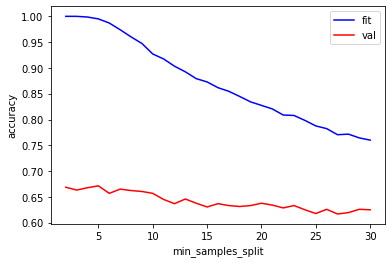

In [66]:
plt.plot(df_log["min_samples_split"], df_log["score(fit)"], label='fit', color='b')
plt.plot(df_log["min_samples_split"], df_log["score(val)"], label='val', color='r')
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.legend()

##### min_samples_leaf

In [67]:
lst_hp = range(1,500,50)
log_hp = []

for hp in lst_hp:
    rf_clf_tun = RandomForestClassifier(min_samples_leaf=hp, random_state=41)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"min_samples_leaf : {hp}, score(fit) = {score_fit:.5f}, score(val) = {score_val:.5f}")
    log_hp.append({
        "min_samples_leaf" : hp,
        "score(fit)" : score_fit,
        "score(val)" : score_val
    })
    
df_log = pd.DataFrame(log_hp) 

min_samples_leaf : 1, score(fit) = 1.00000, score(val) = 0.66879
min_samples_leaf : 51, score(fit) = 0.58640, score(val) = 0.56051
min_samples_leaf : 101, score(fit) = 0.56253, score(val) = 0.55596
min_samples_leaf : 151, score(fit) = 0.55434, score(val) = 0.55050
min_samples_leaf : 201, score(fit) = 0.54707, score(val) = 0.54595
min_samples_leaf : 251, score(fit) = 0.53661, score(val) = 0.53867
min_samples_leaf : 301, score(fit) = 0.53729, score(val) = 0.53321
min_samples_leaf : 351, score(fit) = 0.53524, score(val) = 0.53139
min_samples_leaf : 401, score(fit) = 0.53161, score(val) = 0.52502
min_samples_leaf : 451, score(fit) = 0.52979, score(val) = 0.52320


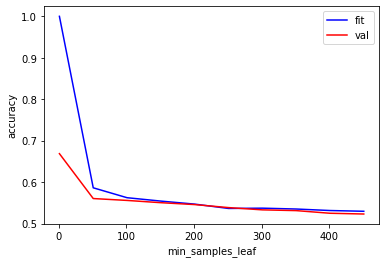

In [68]:
plt.plot(df_log["min_samples_leaf"], df_log["score(fit)"], label='fit', color='b')
plt.plot(df_log["min_samples_leaf"], df_log["score(val)"], label='val', color='r')
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()

##### ccp_alpha

In [69]:
lst_hp = np.arange(0.0,2.0,0.01)
log_hp = []

for hp in lst_hp:
    rf_clf_tun = RandomForestClassifier(ccp_alpha=hp, random_state=41)
    
    rf_clf_tun.fit(X_fit, y_fit)
    pred_fit = rf_clf_tun.predict(X_fit)
    pred_val = rf_clf_tun.predict(X_val)
    
    score_fit = accuracy_score(y_fit, pred_fit)
    score_val = accuracy_score(y_val, pred_val)
    
    print(f"ccp_alpha : {hp}, score(fit) = {score_fit:.5f}, score(val) = {score_val:.5f}")
    log_hp.append({
        "ccp_alpha" : hp,
        "score(fit)" : score_fit,
        "score(val)" : score_val
    })
    
df_log = pd.DataFrame(log_hp) 

ccp_alpha : 0.0, score(fit) = 1.00000, score(val) = 0.66879
ccp_alpha : 0.01, score(fit) = 0.52638, score(val) = 0.52502
ccp_alpha : 0.02, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.03, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.04, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.05, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.06, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.07, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.08, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.09, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.1, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.11, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.12, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.13, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.14, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.15, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 0.16, score(fi

ccp_alpha : 1.32, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.33, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.34, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.35, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.36, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.37, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.3800000000000001, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.3900000000000001, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.4000000000000001, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.41, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.42, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.43, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.44, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.45, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.46, score(fit) = 0.43679, score(val) = 0.45041
ccp_alpha : 1.47, score(fit) = 0.43679, sco